In [116]:
#Import all the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from numpy import nan as na
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import ADASYN
from sklearn.preprocessing import StandardScaler as sd
from sklearn.linear_model import LogisticRegression as lg
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC,SVC
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score,accuracy_score,roc_auc_score,roc_curve
from sklearn.metrics import precision_score,recall_score


In [117]:
import pandas as pd

# URL of the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv"

# Load the dataset directly from the URL
data = pd.read_csv(url)

## Data attributes and statistical analysis

In [23]:
# Display the first few rows
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [24]:
# tail means printing the last 5 records
data.tail(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0,0.0,0,0.0,3,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


In [25]:
# we need check first wheather our dataset having null values or not
data.isnull().sum() #or data.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

There is no missing values

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

data.info() method in pandas provides a concise summary of a DataFrame, including information about the columns and data types.

Observations:

RangeIndex: implying that there are 12330 entries.
Data columns:details about column in the DataFrame.

The DataFrame contains 18 columns.
Each column has 12330 non-null values, indicating that there are no missing values in the DataFrame.
The columns have various data types:
int64: Integer values.
float64: Floating-point values.
object: String or categorical values.
bool: Boolean values.
The memory usage of the DataFrame is approximately 1.5+ MB.

In [27]:
# shape which is really helpful to find numbers of rows and columns
data.shape

(12330, 18)

In [28]:
# when we describe our data set we could see our mean,meadian,min,max and all
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


Based on the output:

Administrative: The mean number of administrative pages visited is approximately 2.32, with a standard deviation of around 3.32. The maximum number of administrative pages visited is 27.
Administrative_Duration: The mean duration spent on administrative pages is approximately 80.82 seconds, with a standard deviation of around 176.78 seconds. The maximum duration observed is 3398.75 seconds.

In [29]:
type(data)

pandas.core.frame.DataFrame

In [30]:
# names of the independent features (also known as predictor variables or input variables)
print('Independent Features: ',list(data.columns[:-1]))

Independent Features:  ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']


 this code snippet is extracting the names of all columns in the DataFrame except for the last one (which is typically the dependent variable or target variable) and printing them out. It's useful for identifying and verifying which columns are considered independent features in the dataset.

In [31]:
print('Target Feature:',list(data.columns[-1:]))

Target Feature: ['Revenue']


In [32]:
# To get value counts for the 'Revenue' column
data['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

## Data Cleaning

In [33]:
# Create a new DataFrame (data_converted) as a copy of the original data
data_converted = data.copy()

# check the information of the new DataFrame
data_converted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [34]:
# Convert from real numbers to categorical

# Define columns to be converted to categorical
categorical_columns = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'SpecialDay']

# Convert 'Month' to categorical
data_converted['Month'] = data_converted['Month'].astype('category')

# Convert other specified columns to categorical
data_converted[categorical_columns] = data_converted[categorical_columns].astype('category')

# Convert 'VisitorType' to categorical (assuming it's non-ordinal)
data_converted['VisitorType'] = pd.Categorical(data_converted['VisitorType'])

# Save the new dataset to a CSV file
data_converted.to_csv('data_2.csv', index=False)


In [35]:
from google.colab import files

# Download the CSV file to local drive
files.download('data_2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [36]:
data_converted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Administrative           12330 non-null  int64   
 1   Administrative_Duration  12330 non-null  float64 
 2   Informational            12330 non-null  int64   
 3   Informational_Duration   12330 non-null  float64 
 4   ProductRelated           12330 non-null  int64   
 5   ProductRelated_Duration  12330 non-null  float64 
 6   BounceRates              12330 non-null  float64 
 7   ExitRates                12330 non-null  float64 
 8   PageValues               12330 non-null  float64 
 9   SpecialDay               12330 non-null  category
 10  Month                    12330 non-null  category
 11  OperatingSystems         12330 non-null  category
 12  Browser                  12330 non-null  category
 13  Region                   12330 non-null  category
 14  Traffi

In [37]:
data_converted.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

#Analysis and Visualization

In [38]:
#Here below we splited the numerical and catagorical columns

num_cols=[col for col in data_converted.select_dtypes(include=np.number)]
cat_cols=[col for col in data_converted.select_dtypes(exclude=np.number)]

print('Numerical column:',len(num_cols),'catagorcal column:',len(cat_cols))
print('Numerical Column Names:',num_cols)
print('catagorcial Column Names:',cat_cols)


Numerical column: 9 catagorcal column: 9
Numerical Column Names: ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues']
catagorcial Column Names: ['SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']


# Density plot for numerical columns

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

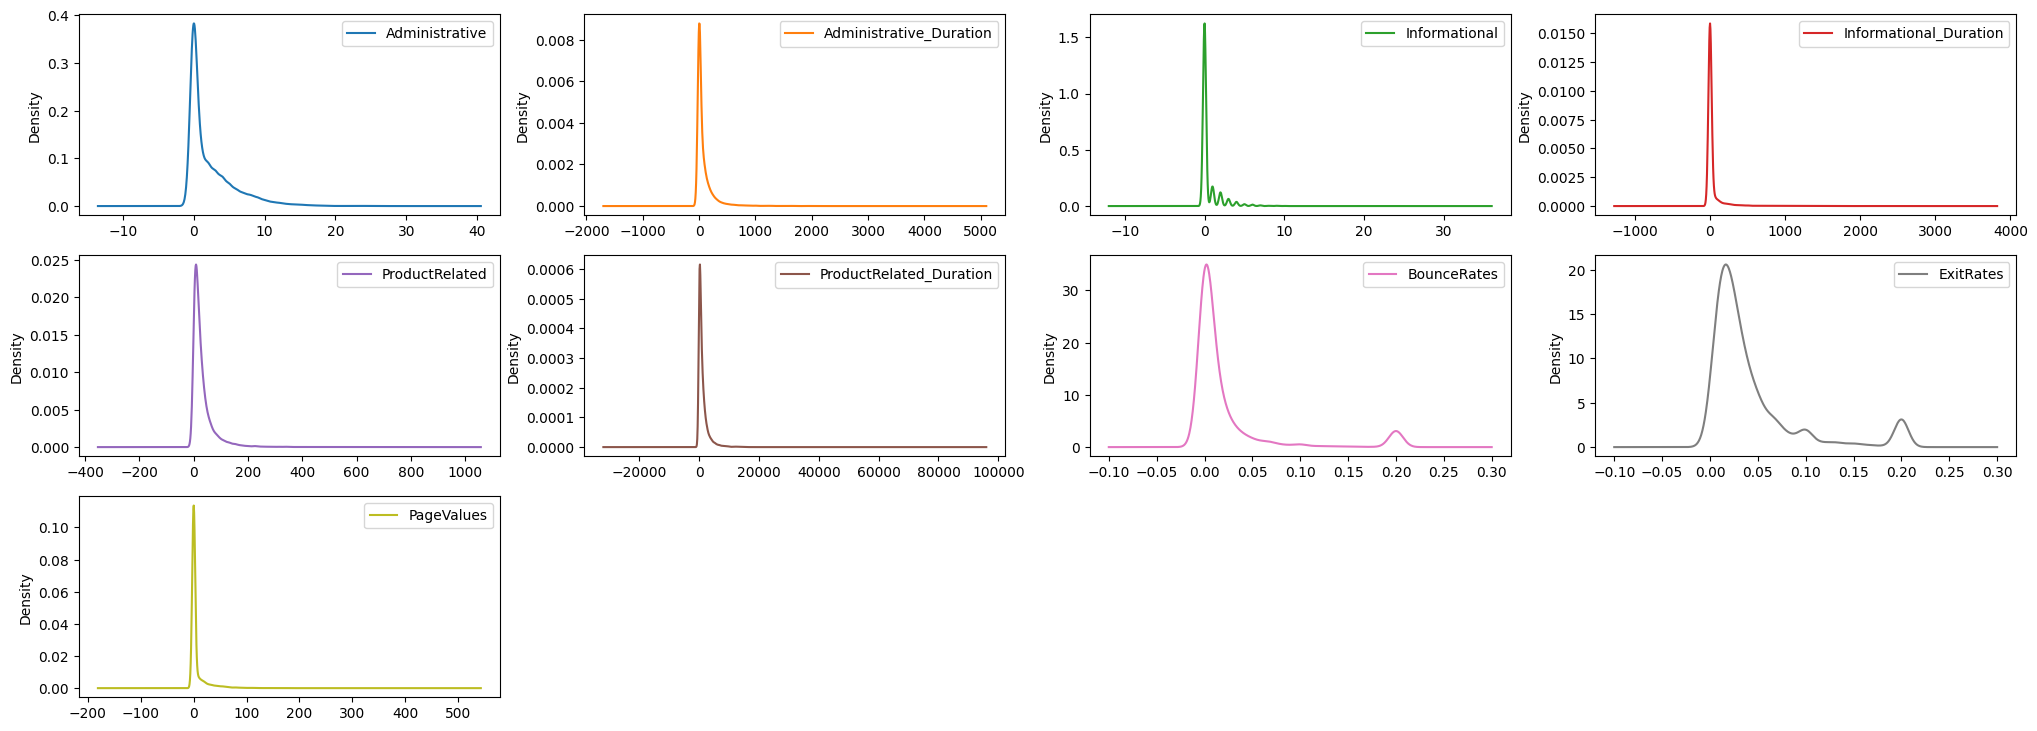

In [39]:
# Create density plots for numerical columns
data[num_cols].plot(kind='density', subplots=True, layout=(4, 4), sharex=False, figsize=(25, 12))

Density plots provide insights into the distribution of data values for each numerical variable. They help in understanding the shape of the data distribution, and we can see most of them are right skewed, whereas ExitRate has slight multimodal distribution.

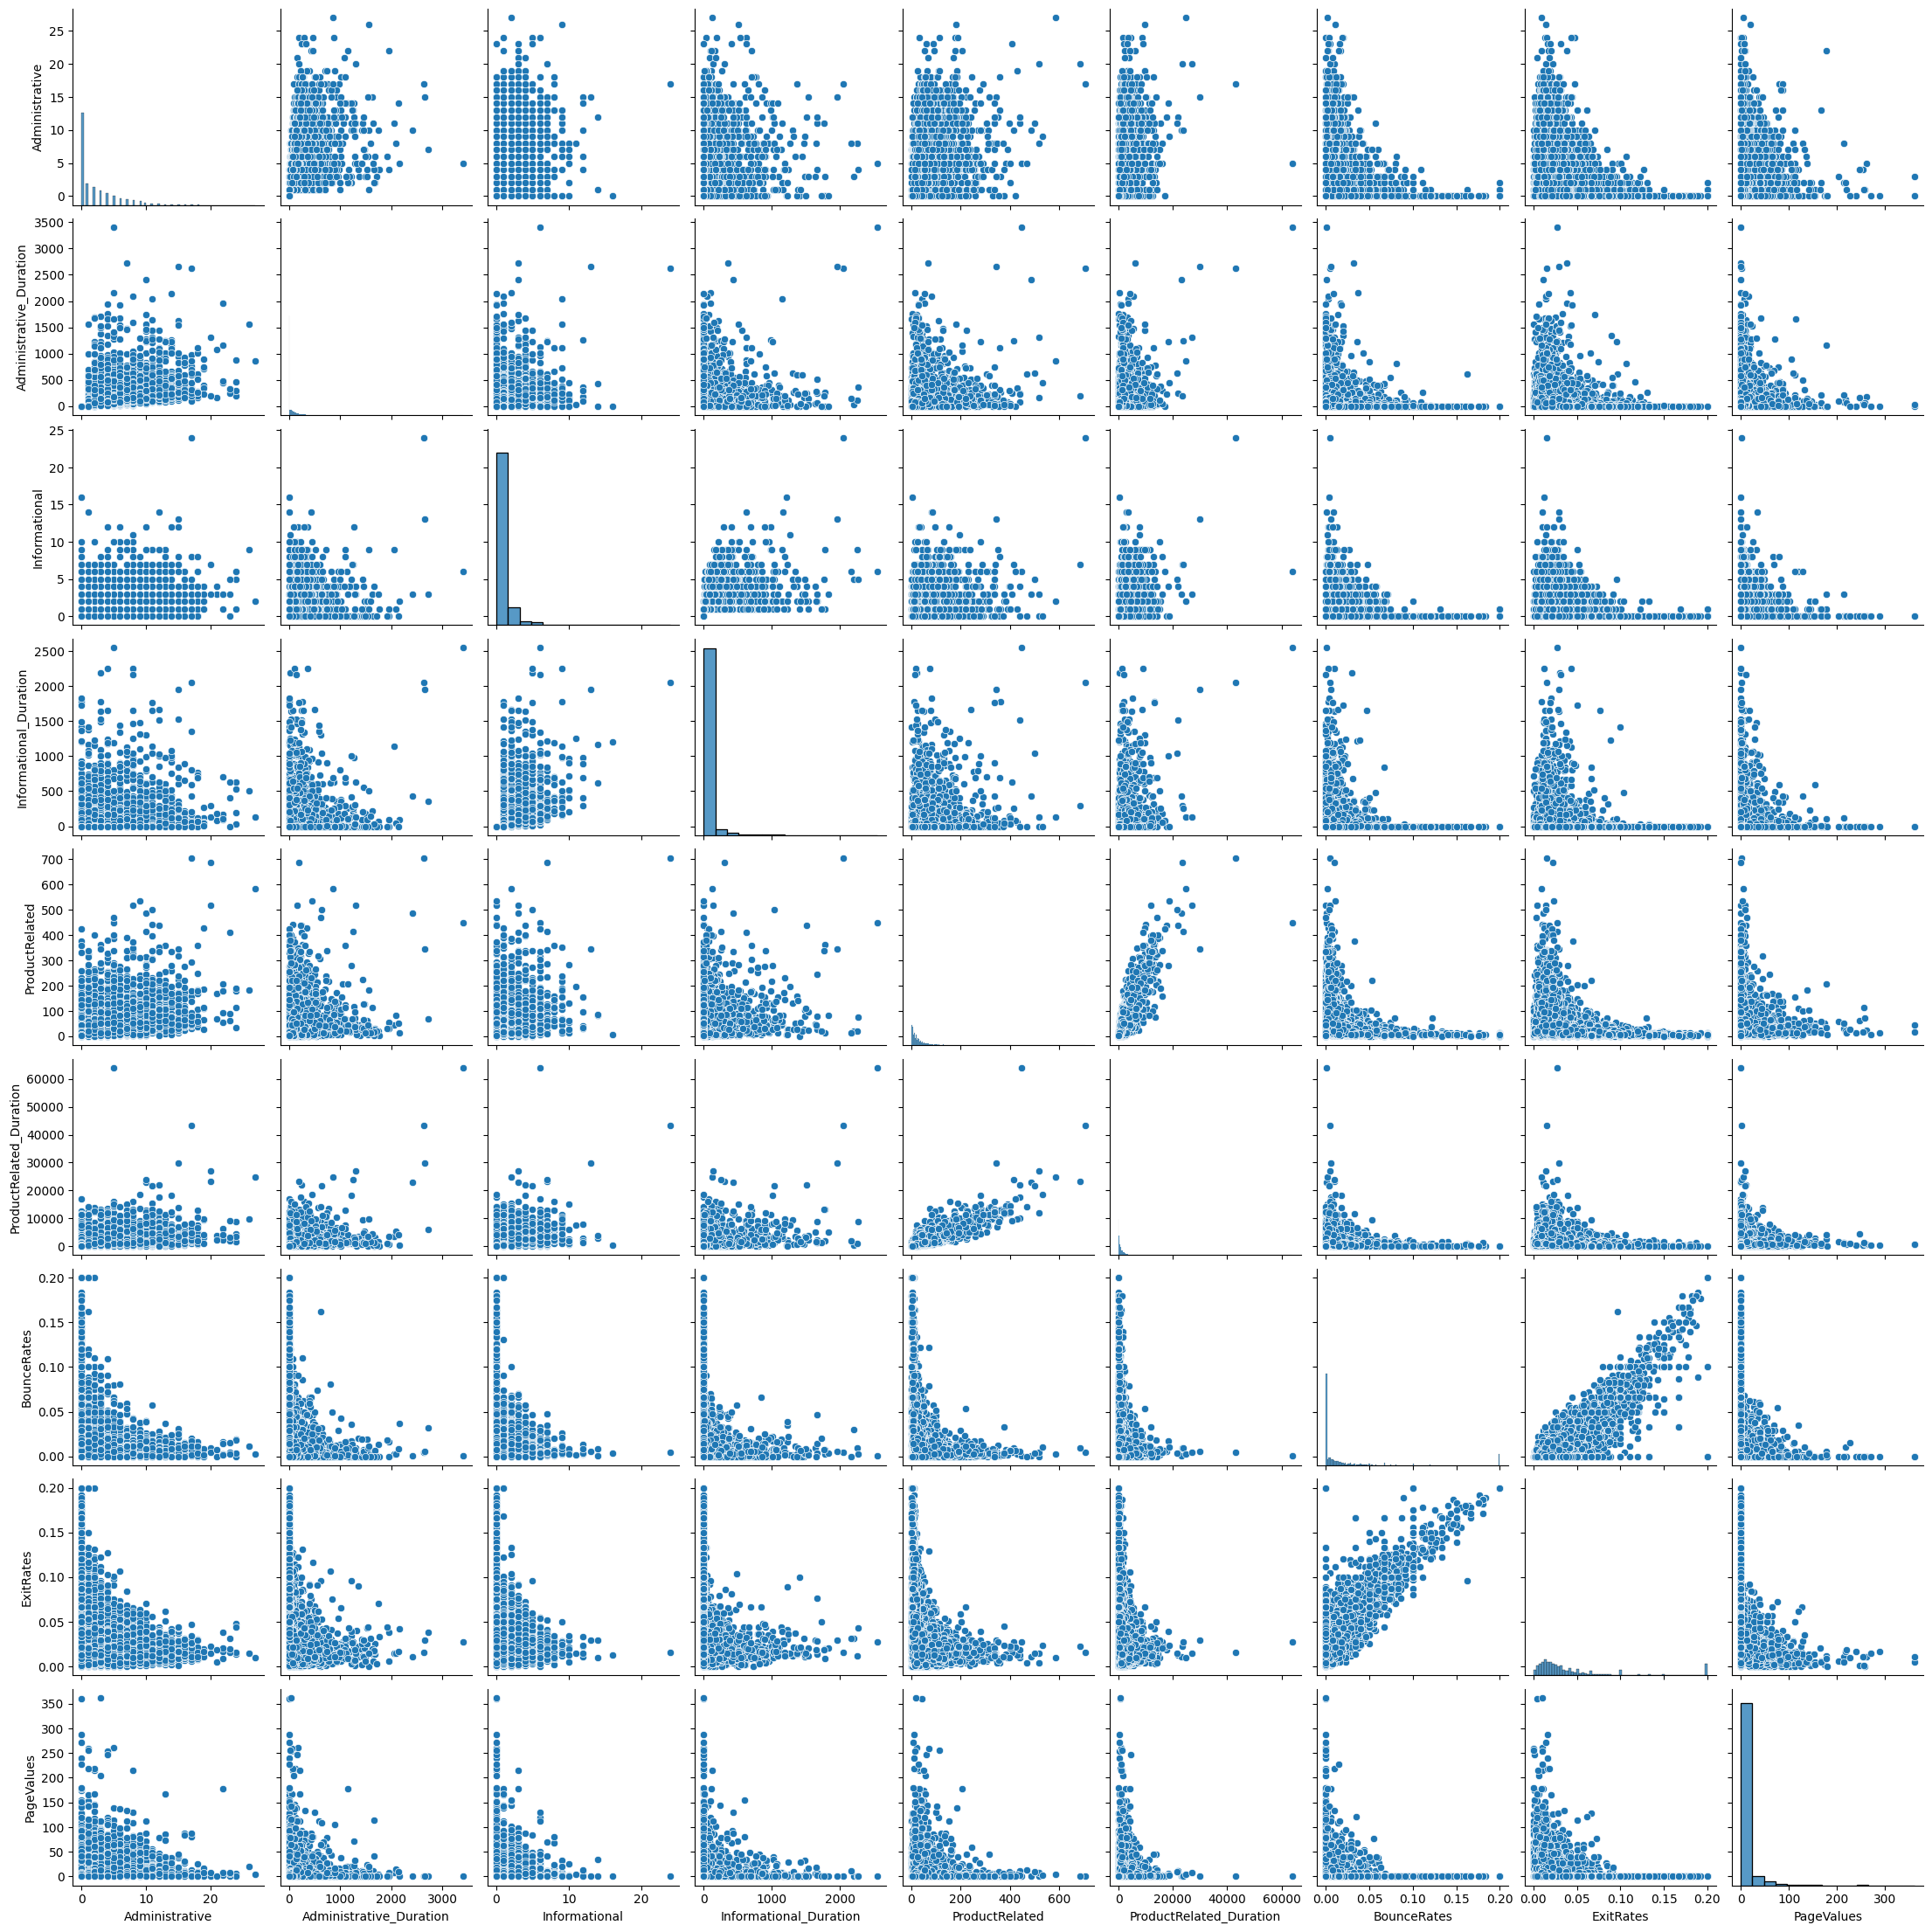

In [40]:
import seaborn as sns

# Create scatter plot matrix using seaborn
# sns.pairplot(data_converted[numerical_cols])
sns.pairplot(data_converted[num_cols])
plt.show()

# Box-and-whisker plots for numerical col

Administrative                Axes(0.125,0.712609;0.168478x0.167391)
Administrative_Duration    Axes(0.327174,0.712609;0.168478x0.167391)
Informational              Axes(0.529348,0.712609;0.168478x0.167391)
Informational_Duration     Axes(0.731522,0.712609;0.168478x0.167391)
ProductRelated                Axes(0.125,0.511739;0.168478x0.167391)
ProductRelated_Duration    Axes(0.327174,0.511739;0.168478x0.167391)
BounceRates                Axes(0.529348,0.511739;0.168478x0.167391)
ExitRates                  Axes(0.731522,0.511739;0.168478x0.167391)
PageValues                     Axes(0.125,0.31087;0.168478x0.167391)
dtype: object

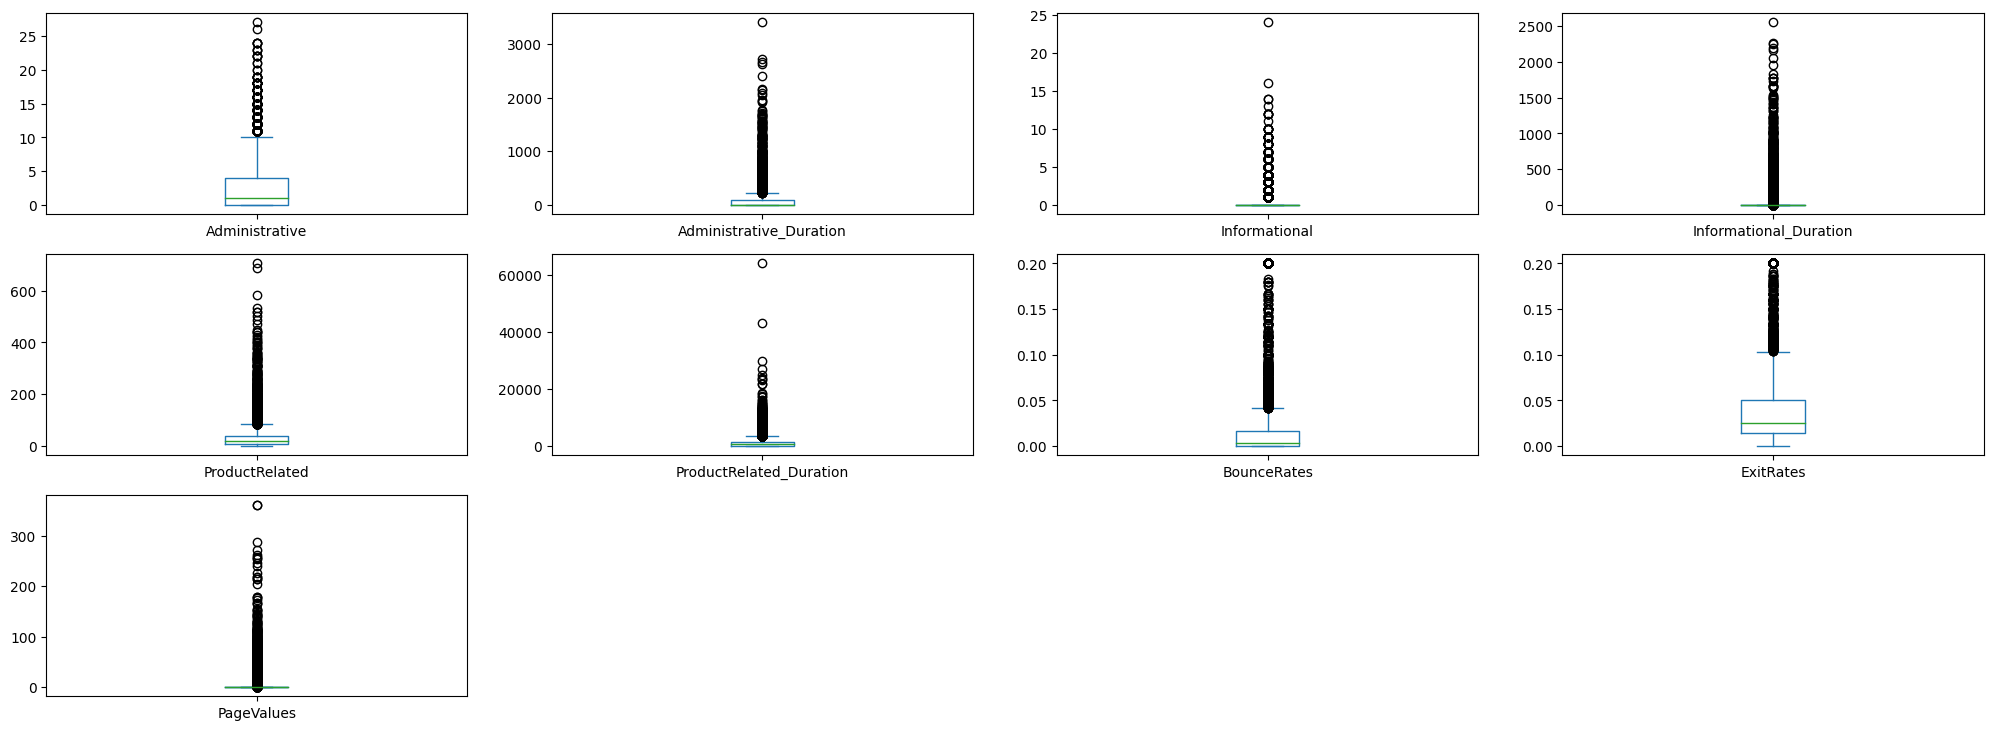

In [41]:
#Print the box plot for numerical col
#data_converted[numerical_cols].plot(kind='box',subplots=True,layout=(4,4),figsize=(25,12))
data_converted[num_cols].plot(kind='box',subplots=True,layout=(4,4),figsize=(25,12))

There are a significant number of data points in each attribute that fall far outside the typical range of values observed for that attribute. Depending on the context of your analysis, we can handle outliers differently, such as removing them, transforming them, or analyzing them separately. There are several reasons why we choose not to deal with outliers:
Realistic Representation: In e-commerce and online shopping behavior, outliers could represent genuine instances of extreme purchasing behavior, such as high-value transactions or unusual browsing pattern. data may contain valuable insights into consumer preferences, buying habits, or exceptional events such as promotions, sales, or seasonal trends. Decision-makers in e-commerce companies may prioritize understanding the entire spectrum of customer behavior, including outliers, to make informed business decisions. Removing outliers could obscure important insights and hinder strategic decision-making.
in the context of the Online Shoppers Purchasing Intention Dataset and its potential for right-skewed distributions with significant outliers, retaining and analyzing outliers can provide valuable insights for business strategy, marketing tactics, revenue optimization, and customer engagement.

## Imbalance dataset

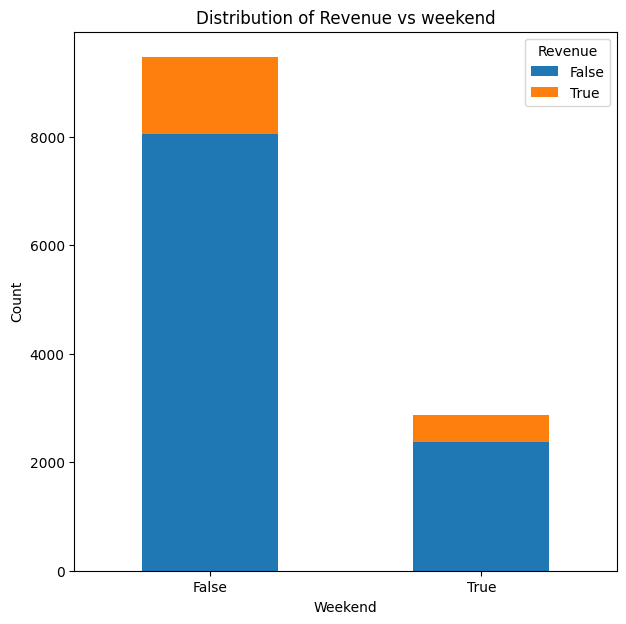

In [42]:
import matplotlib.pyplot as plt

data_converted.groupby('Weekend')['Revenue'].value_counts().unstack('Revenue').plot(kind='bar', stacked=True, figsize=(7,7))
plt.title("Distribution of Revenue vs weekend")  # Add figure name
plt.xlabel("Weekend")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend(title="Revenue")
plt.show()


The dataset exhibits some imbalance, with only 15% of sessions resulting in a purchase. Although this imbalance isn’t severe, we can still explore techniques or algorithms that handle such scenarios effectively.

## Importance of Page Values

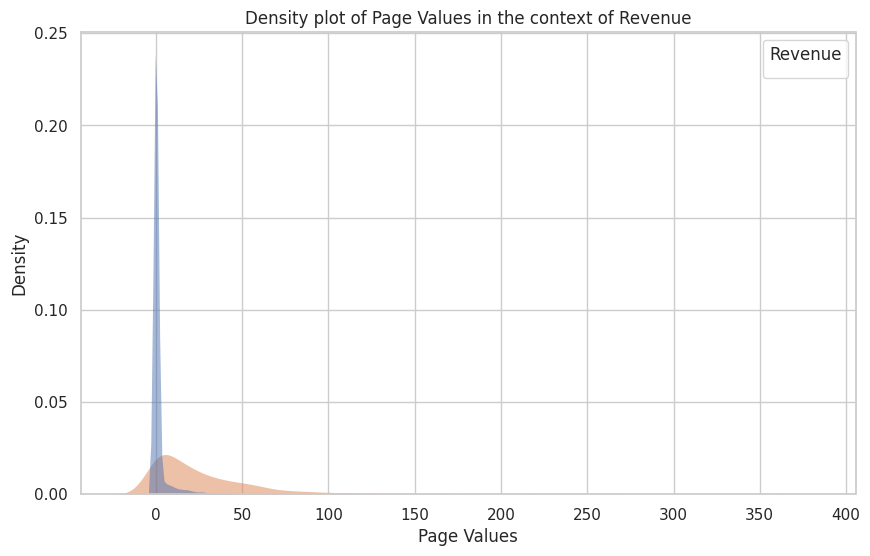

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the seaborn plot
sns.set(style="whitegrid")

# Create a density plot of PageValues with hue as Revenue
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data_converted, x='PageValues', hue='Revenue', fill=True, common_norm=False, alpha=0.5, linewidth=0)
plt.title('Density plot of Page Values in the context of Revenue')
plt.xlabel('Page Values')
plt.ylabel('Density')
plt.legend(title='Revenue', loc='upper right')
plt.show()


In e-commerce, PageValues represent the average value of pages visited by users. Specifically, it assigns importance to pages like checkout or those leading up to checkout. Notably, a PageValues above 5 significantly boosts the likelihood of purchase conversion. Thus, this feature serves as a robust indicator of user purchase intent.

<ipython-input-44-ea12caea34fb>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['Revenue'] == 1]['BounceRates'], label='Purchase', shade=True)
<ipython-input-44-ea12caea34fb>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['Revenue'] == 0]['BounceRates'], label='No Purchase', shade=True)


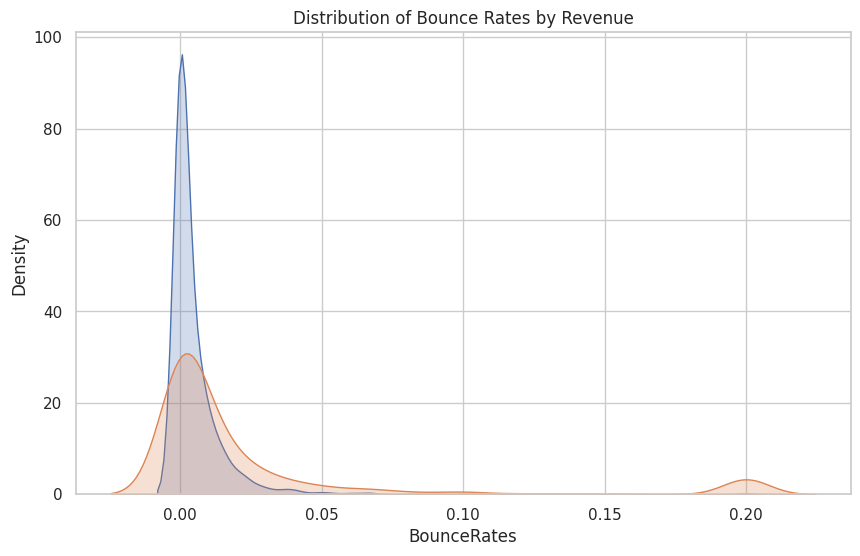

In [44]:
# Example for Bounce Rates
plt.figure(figsize=(10, 6))
sns.kdeplot(data[data['Revenue'] == 1]['BounceRates'], label='Purchase', shade=True)
sns.kdeplot(data[data['Revenue'] == 0]['BounceRates'], label='No Purchase', shade=True)
plt.title('Distribution of Bounce Rates by Revenue')
plt.show()


In [45]:
#Visitor type
data_converted['VisitorType'].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

<Axes: >

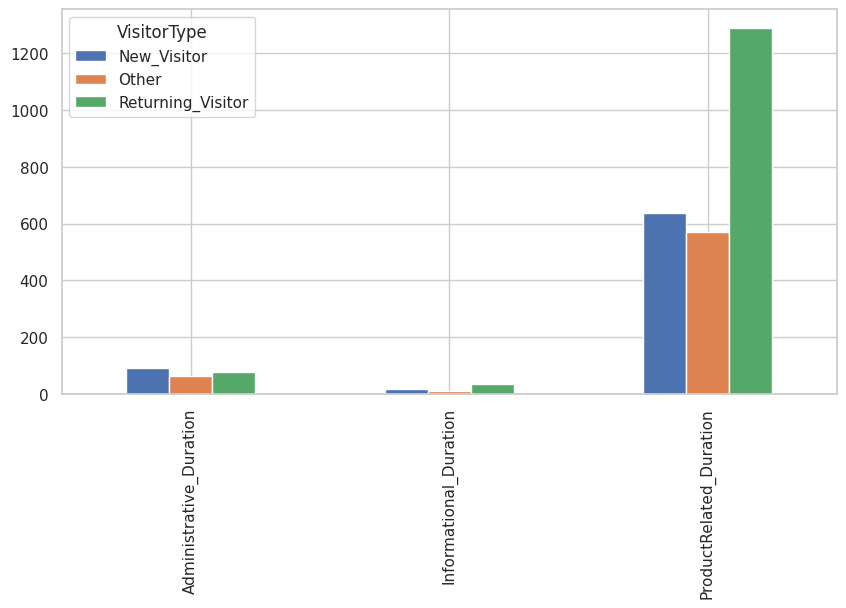

In [46]:
admin_dpt=data_converted[['Administrative_Duration','ProductRelated_Duration','Informational_Duration','VisitorType']]

pd.pivot_table(admin_dpt,values=['Administrative_Duration','ProductRelated_Duration','Informational_Duration'],columns=['VisitorType'],aggfunc='mean').plot(kind='bar',figsize=(10,5))


# Correlation

In [47]:
Month={'Feb':2, 'Mar':3, 'May':5, 'Oct':10, 'June':6, 'Jul':7, 'Aug':8, 'Nov':11, 'Sep':9,'Dec':12}
data_converted['Month']=data_converted['Month'].map(Month)


In [48]:
VisitorType={'Returning_Visitor':3, 'New_Visitor':2, 'Other':1}
data_converted['VisitorType']=data_converted['VisitorType'].map(VisitorType)


<ipython-input-49-45f4c0e79021>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,cmap='viridis',linewidths=.5)


<Axes: >

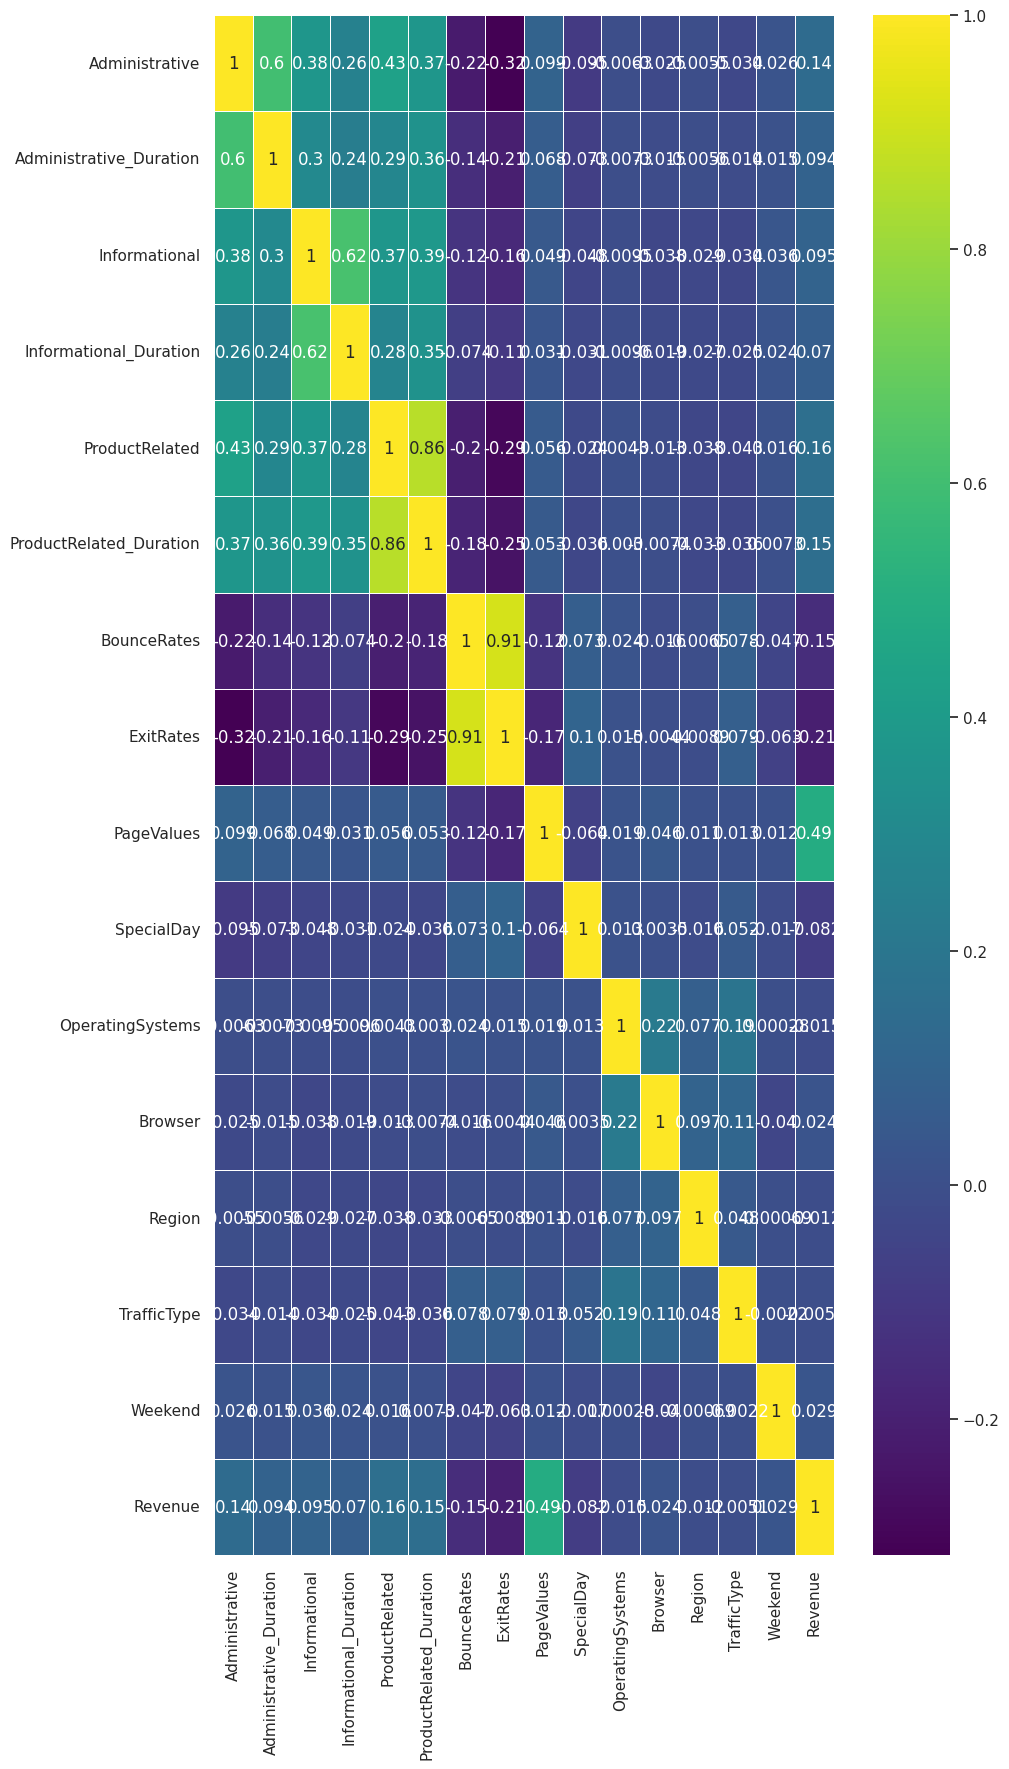

In [49]:


d={True:1,False:0}
data['Weekend']=data['Weekend'].map(d)
data['Revenue']=data['Revenue'].map(d)
plt.figure(figsize=(10,20))
sns.heatmap(data.corr(),annot=True,cmap='viridis',linewidths=.5)


* The statistical test used to investigate the correlation between the variables plotted in the heatmap is Pearson's correlation coefficient. Pearson's correlation coefficient measures the linear relationship between two continuous variables. It ranges from -1 to +1, where:

+1 indicates a perfect positive linear relationship,
0 indicates no linear relationship, and
-1 indicates a perfect negative linear relationship.
In the context of the heatmap, each cell represents the Pearson correlation coefficient between two variables.

**PageViews and Browsing Duration: Higher pageviews and longer browsing durations correlate positively with PageValues. This makes sense, as engaged users tend to explore more pages and spend more time on an e-commerce site. For instance, if a user has a specific item in mind, they might compare prices and read reviews, increasing the likelihood of a purchase.**

**ExitRates and BounceRates: Conversely, ExitRates, which represents the average exit rate of visited pages, is negatively correlated with PageValues. Additionally, ExitRates and BounceRates are positively related. This aligns with our hypothesis: sessions with high exit rates or bounce rates indicate less engagement, leading to fewer conversions.* ***

## Right-skewed feature distribution

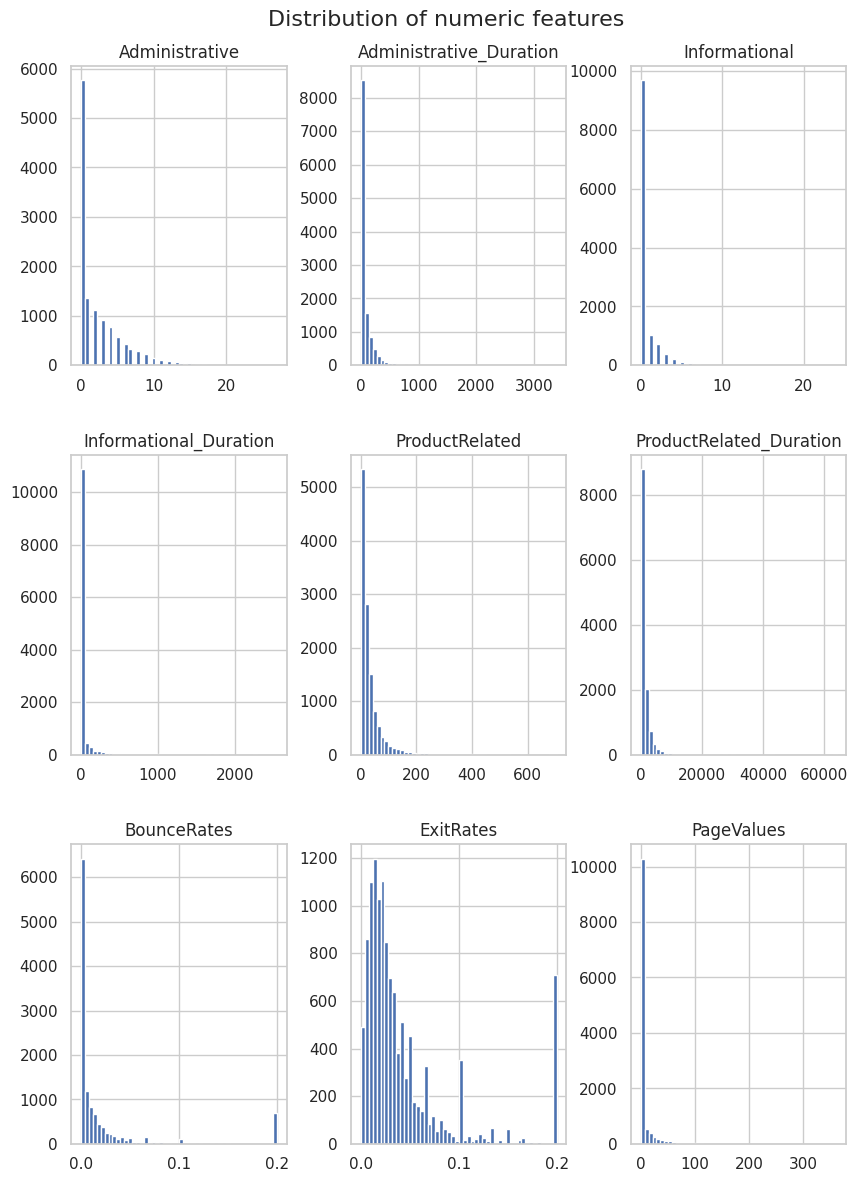

In [50]:
import matplotlib.pyplot as plt

# Plot the histogram of numeric features
data_converted.hist(bins=50, figsize=(10, 14))

# Add headline
plt.suptitle("Distribution of numeric features", fontsize=16, y=0.92)

plt.show()


it’s typical to observe right-skewed distributions for numeric features. These skewed tails indicate that a subset of users exhibits exceptionally high usage patterns.

## Page Matrix analysis:

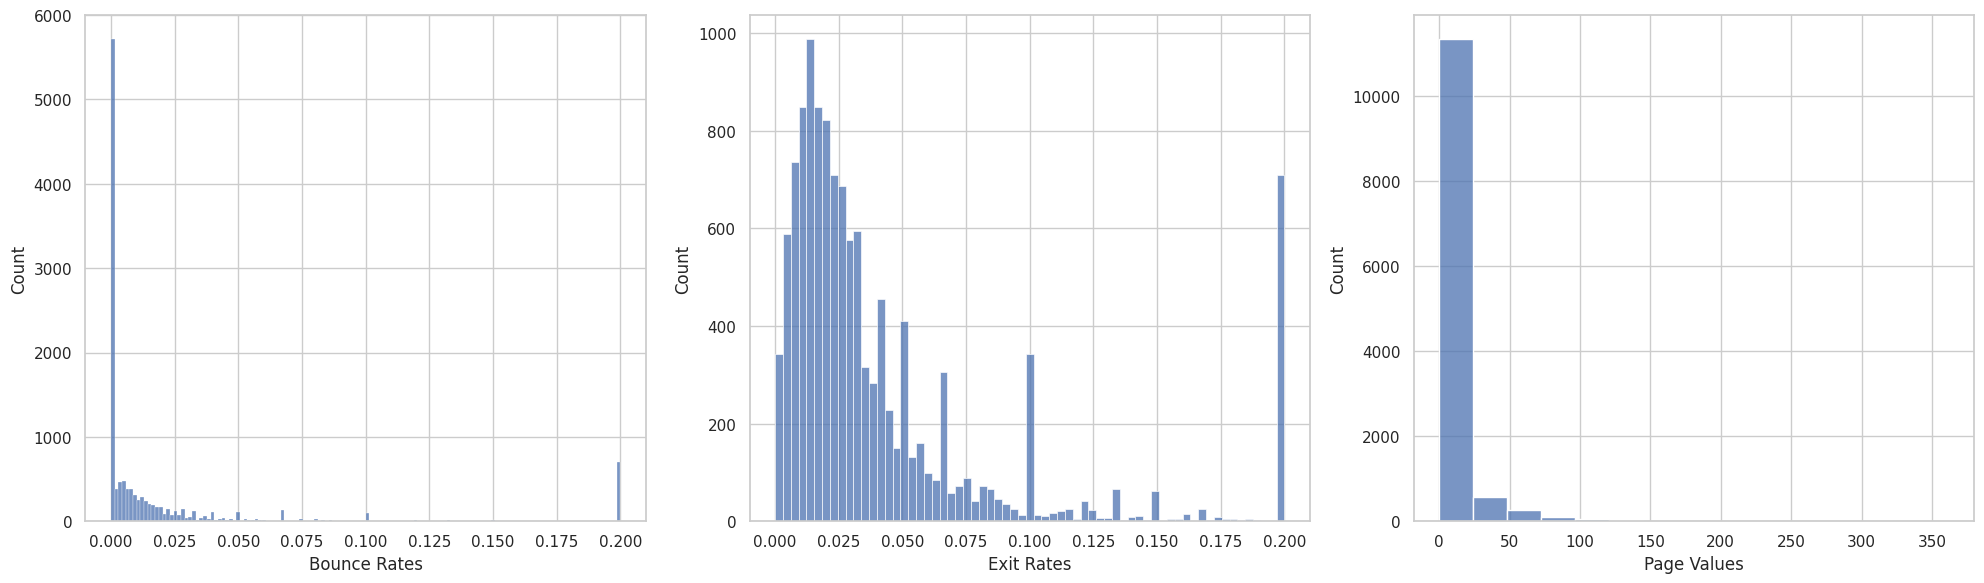

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

sns.histplot(data['BounceRates'], ax=axes[0])
axes[0].set_xlabel('Bounce Rates')

sns.histplot(data['ExitRates'], ax=axes[1])
axes[1].set_xlabel('Exit Rates')

sns.histplot(data['PageValues'], ax=axes[2])
axes[2].set_xlabel('Page Values')

plt.tight_layout()
plt.show()


The above distribution plots of Page Metrics show the following:

* All 3 features have distributions that are right skewed with a lot of outliers.
* The average bounce rate of most of our data points is low. This is a positive observation as high rates would identicate that visitors are not engaging with the website.
* Exit rates are higher in values than bounce rates. This is expected as we can assume that transaction confirmation pages will cause the average exit rate to increase.

## Revenue Analysis

In [52]:
data.Revenue.value_counts()

0    10422
1     1908
Name: Revenue, dtype: int64

0 represents False and 1 represents True

In [53]:
revenue_ratio = data.Revenue.value_counts(normalize=True)
revenue_ratio

0    0.845255
1    0.154745
Name: Revenue, dtype: float64

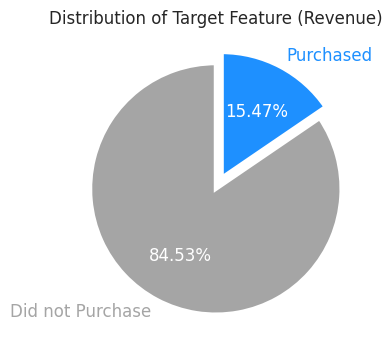

In [54]:
fig, ax = plt.subplots(figsize=(4, 4))

x=revenue_ratio

cmap = plt.get_cmap('Greys')
colors = list(cmap(np.linspace(0.45, len(x))))

colors[1]='dodgerblue'
labels = ['Did not Purchase','Purchased']

patches, texts, pcts = ax.pie(
    x, labels=labels, autopct='%.2f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'medium'},
    startangle=90,
    colors=colors,
    explode=(0, 0.1))

for i, patch in enumerate(patches):
   texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white')
plt.setp(texts, fontweight=300)
ax.set_title('Distribution of Target Feature (Revenue)', fontsize=12)
plt.tight_layout()

Imbalance in the output variable, where 84.53% didnot purchase.

Revenue by visitor type"

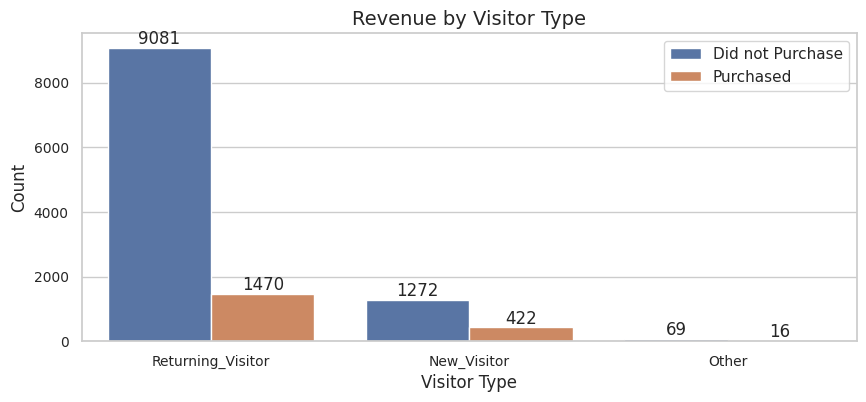

In [55]:
plt.figure(figsize=(10,4))
plt.title("Revenue by Visitor Type", fontsize=14)
ax = sns.countplot(x='VisitorType', data=data, hue = 'Revenue')
ax.legend(labels=['Did not Purchase','Purchased'])
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel("Visitor Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Revenue by Month:

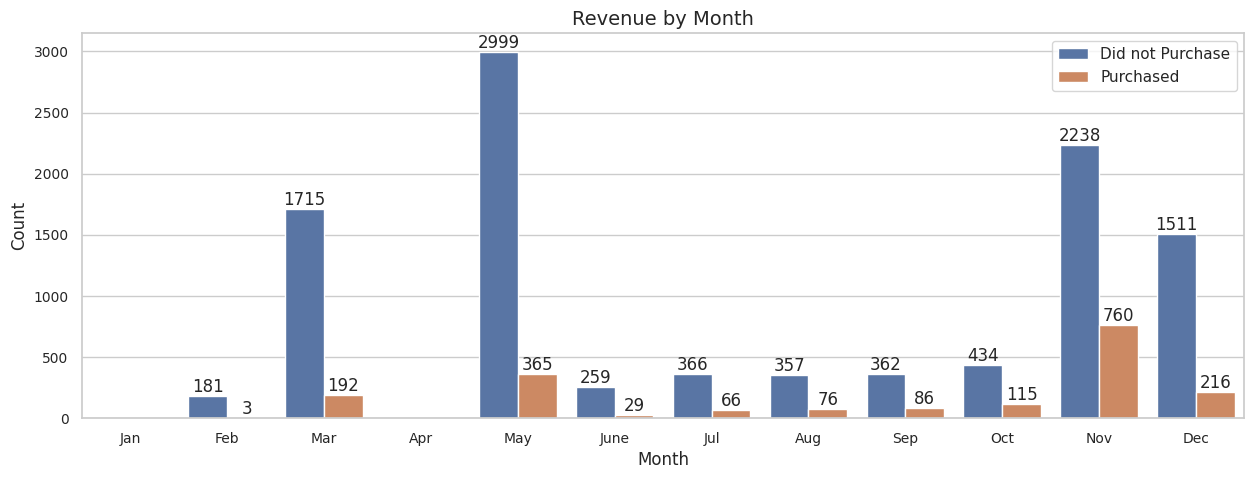

In [56]:
plt.figure(figsize=(15,5))
plt.title("Revenue by Month", fontsize=14)

orderlist = ['Jan','Feb','Mar','Apr','May','June','Jul','Aug','Sep','Oct','Nov','Dec']

ax = sns.countplot(x='Month', data=data, hue = 'Revenue', order=orderlist)
ax.legend(labels=['Did not Purchase','Purchased'])
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

* No data found for January and April
* Lot of the transaction happned at the end of the year

Revenue by Special Day:


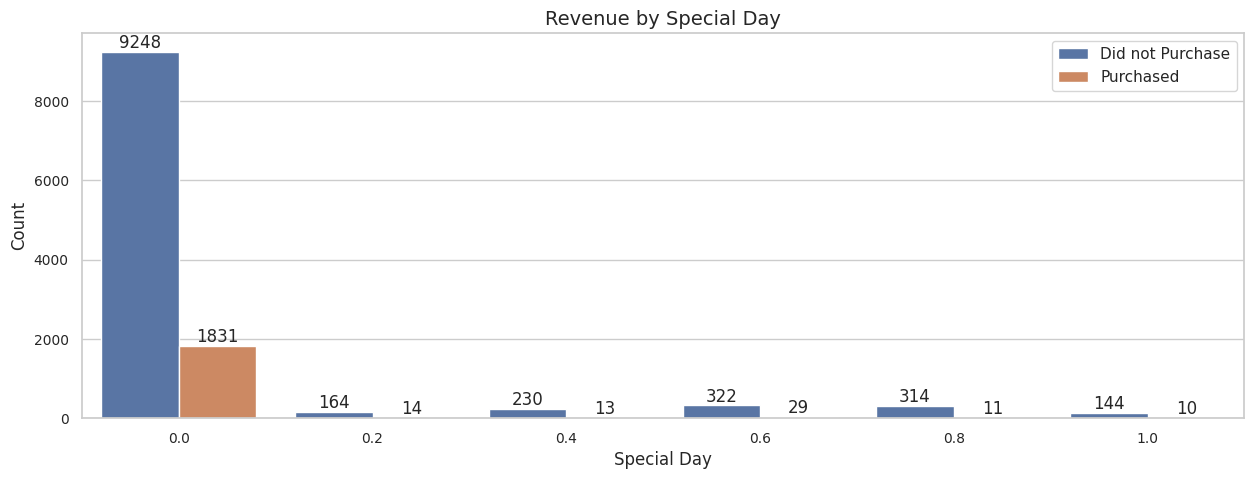

In [57]:
plt.figure(figsize=(15,5))
plt.title("Revenue by Special Day", fontsize=14)

ax = sns.countplot(x='SpecialDay', data=data, hue = 'Revenue')
ax.legend(labels=['Did not Purchase','Purchased'])
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel("Special Day", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

* ***There were significantly more website visitors and revenue generated (Completed purchases) on Special Day 0.0 in comparison to the other special days.***

# Model selection


In our model evaluation, we must consider the context of Type I and Type II errors:

Type I Error (False Positive): Predicting a customer will make a purchase when they actually do not.
Type II Error (False Negative): Predicting a customer will not make a purchase when they actually do.
Next, let’s align with the business objectives of an e-commerce company that might use this model. We assume their goals are twofold:

Maximize Revenue: Achieve a higher purchase conversion rate.
Minimize Disruption: Avoid negatively impacting the customer experience through targeted nudges.
Given this context, the relevant metrics include precision and recall. Specifically, we aim to maximize recall while ensuring a minimum threshold of 60% precision, as dictated by business requirements and tolerance. This approach ensures that we capture as many potential buyers as possible while minimizing the risk of falsely targeting customers who are unlikely to make a purchase.

## Baseline Model

To build a baseline model using the DummyClassifier from scikit-learn with the default parameters while ensuring that the dataset is properly prepared without any bias or information leakage, we should follow these steps:

Feature Selection: Decide whether to select the features before splitting the dataset or only on the training set after splitting. It's generally recommended to select features after splitting the dataset to prevent information leakage. We'll select features after splitting.
Prepare Dataset: Since we've already converted certain columns to categorical and saved the modified dataset as 'data_2.csv', we'll load this dataset and split it into training and testing sets.
Build Baseline Model: Create a baseline model using the DummyClassifier with the default strategy parameter 'prior'.

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

# Load the preprocessed dataset
data_converted = pd.read_csv('data_2.csv')

# Split the data into features (X) and target variable (y)
X = data_converted.drop('Revenue', axis=1)
y = data_converted['Revenue']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the DummyClassifier with the default strategy parameter 'prior'
dummy_model = DummyClassifier(strategy='prior')

# Train the baseline model
dummy_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dummy = dummy_model.predict(X_test)

# Evaluate the baseline model
accuracy_dummy = accuracy_score(y_test, y_pred_dummy)
print("Baseline Model Accuracy:", accuracy_dummy)


Baseline Model Accuracy: 0.8333333333333334


This code ensures that the dataset is properly prepared without any bias or information leakage by selecting features after splitting. It then builds a baseline model using the DummyClassifier with the default strategy parameter 'prior' and evaluates its accuracy.

The baseline model accuracy of approximately 0.83, or 83.33%, means that the DummyClassifier, which always predicts the class that maximizes the class prior (the majority class), correctly predicts the target variable (Revenue) for approximately 83.33% of the instances in the test set.

In other words, the baseline model, which makes predictions without any actual learning or intelligence, achieves an accuracy of around 83.33%. This accuracy indicates how often the model's predictions align with the true values in the test set.

However, it's essential to interpret this accuracy in the context of the dataset and the business problem. In this case, accuracy alone might not provide a complete picture, especially if the dataset is imbalanced or if certain types of errors (e.g., false positives or false negatives) are more costly than others.

Therefore, while the baseline accuracy of 83.33% provides a starting point for model evaluation, it's crucial to consider other metrics and conduct further analysis to assess the model's performance comprehensively.

## Models

    ### Correlation Analysis

<ipython-input-59-99e6df162859>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

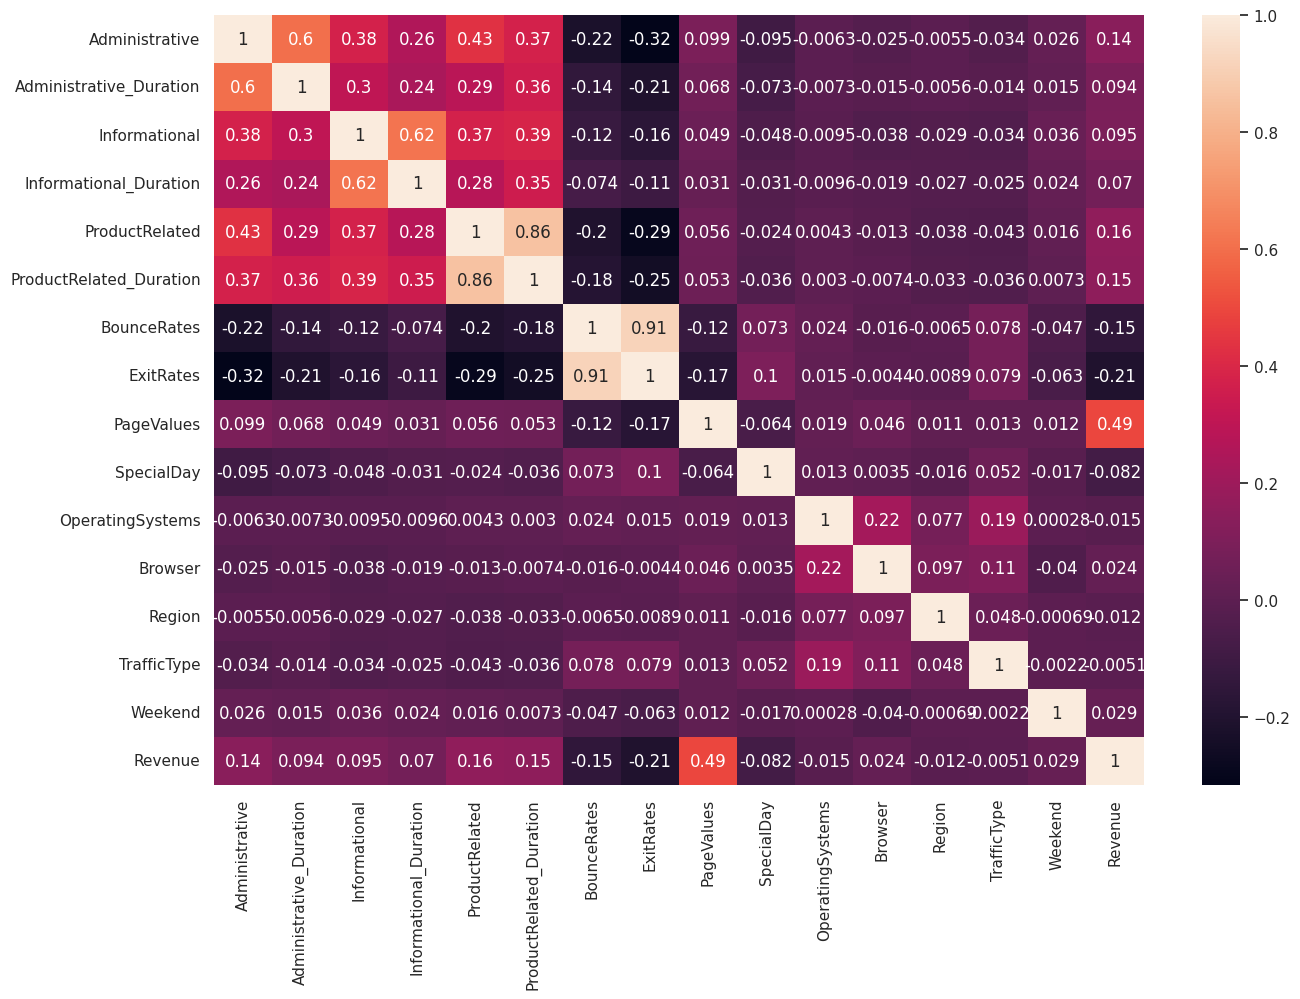

In [59]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True)

***The Heatmap shows there is little correlation among the different features with the exception of the following:***

- High correlation between:

        - BounceRates & ExitRates (0.91).
        - ProductRelated & ProductRelated_Duration (0.86).
- Moderate Correlations:

        - Administrative & Administrative DUration (0.6)
        - Informational and Informational Duration (0.62)
        - Page Values and Revenue (0.49)

## Page Matrix analysis:

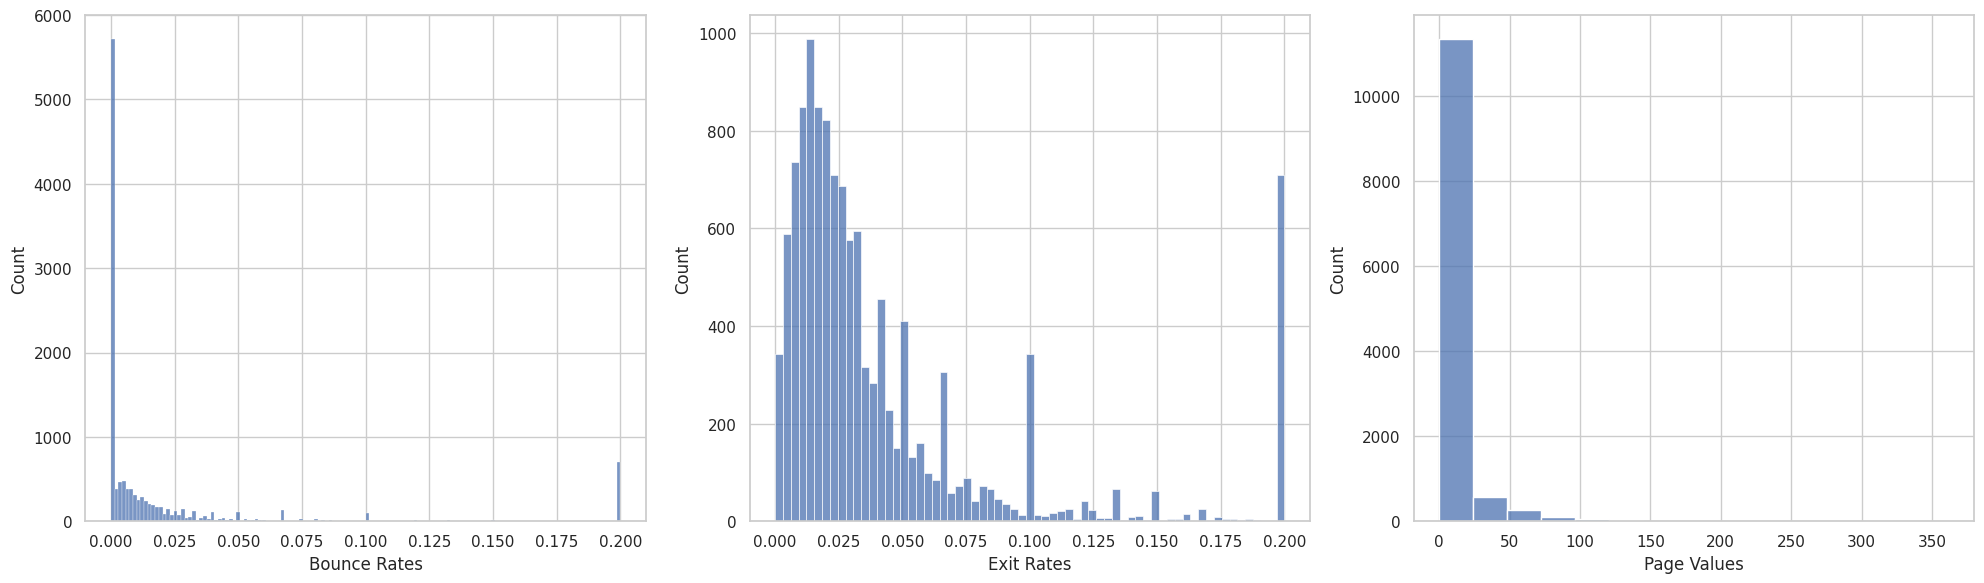

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

sns.histplot(data['BounceRates'], ax=axes[0])
axes[0].set_xlabel('Bounce Rates')

sns.histplot(data['ExitRates'], ax=axes[1])
axes[1].set_xlabel('Exit Rates')

sns.histplot(data['PageValues'], ax=axes[2])
axes[2].set_xlabel('Page Values')

plt.tight_layout()
plt.show()


The above distribution plots of Page Metrics show the following:

* All 3 features have distributions that are right skewed with a lot of outliers.
* The average bounce rate of most of our data points is low. This is a positive observation as high rates would identicate that visitors are not engaging with the website.
* Exit rates are higher in values than bounce rates. This is expected as we can assume that transaction confirmation pages will cause the average exit rate to increase.

## Data Pre-Processing

In this section we will make our data ready for model training. This will include:

* Encode Categorical features using dummy encoding
* Encode Boolean variables using label encoder
* Split Data into train and test set
* Scale train set using the standard scaler

In [68]:
# Encode categorical features (Month, Visitor Type) using dummy encoding

categorical = ['Month', 'VisitorType']

encoded_features = pd.get_dummies(data[categorical])
encoded_features.head(3)

,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,0,0,1


In [69]:
#Concactenante encoded features to dataset and drop non-encoded variables

data = pd.concat([data, encoded_features], axis=1)

data.drop(categorical, axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 12330 non-null  int64  
 1   Administrative_Duration        12330 non-null  float64
 2   Informational                  12330 non-null  int64  
 3   Informational_Duration         12330 non-null  float64
 4   ProductRelated                 12330 non-null  int64  
 5   ProductRelated_Duration        12330 non-null  float64
 6   BounceRates                    12330 non-null  float64
 7   ExitRates                      12330 non-null  float64
 8   PageValues                     12330 non-null  float64
 9   SpecialDay                     12330 non-null  float64
 10  OperatingSystems               12330 non-null  int64  
 11  Browser                        12330 non-null  int64  
 12  Region                         12330 non-null 

In [78]:
from sklearn.preprocessing import LabelEncoder

# Encode Boolean variables using label Encoder
le = LabelEncoder()

data['Revenue'] = le.fit_transform(data['Revenue'])
data['Weekend'] = le.fit_transform(data['Weekend'])

print(data['Revenue'].value_counts())
print(data['Weekend'].value_counts())


0    10422
1     1908
Name: Revenue, dtype: int64
0    9462
1    2868
Name: Weekend, dtype: int64


### Select Target and Features

In [79]:
y = data['Revenue']
X = data.drop('Revenue', axis=1)

In [80]:
#Split Dataset into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [82]:
from sklearn.preprocessing import StandardScaler

# Scale train set using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, index=X_train.index, columns=X_train.columns)

X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, index=X_test.index, columns=X_test.columns)


In [83]:
X_train_scaled.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
9076,-0.698059,-0.458984,-0.398423,-0.245408,-0.688912,-0.618878,-0.461141,1.150445,-0.315965,-0.305974,...,-0.192045,-0.157144,-0.426431,-0.611137,1.755785,-0.221888,-0.196858,-0.401269,-0.079347,0.411719
2463,-0.698059,-0.458984,-0.398423,-0.245408,-0.418646,-0.541778,0.164523,-0.101697,-0.315965,-0.305974,...,-0.192045,-0.157144,-0.426431,1.636295,-0.569546,-0.221888,-0.196858,-0.401269,-0.079347,0.411719
1659,-0.698059,-0.458984,-0.398423,-0.245408,-0.576301,-0.597507,-0.461141,-0.206042,-0.315965,-0.305974,...,-0.192045,-0.157144,2.345047,-0.611137,-0.569546,-0.221888,-0.196858,-0.401269,-0.079347,0.411719
118,-0.698059,-0.458984,-0.398423,-0.245408,-0.531257,-0.597781,-0.461141,0.641763,-0.315965,-0.305974,...,-0.192045,-0.157144,-0.426431,-0.611137,-0.569546,-0.221888,-0.196858,-0.401269,-0.079347,0.411719
11654,-0.698059,-0.458984,-0.398423,-0.245408,-0.576301,-0.557779,-0.461141,-0.658205,-0.315965,-0.305974,...,-0.192045,-0.157144,-0.426431,-0.611137,1.755785,-0.221888,-0.196858,2.492093,-0.079347,-2.428843


### Modelling

* Train and evaluate models. Predictive models that will be used are Logistic Regression, KNeighbors Classifier, SVM, Decision Tree and Random Forest Classifier.
* The Scaled Dataset would be used for :- Logistic Regression, KNN and SVM.
* The Unscaled Dataset would be used for :- Decision Tree and Random Forest Classifier.
* Hyperparameter Tuning for the model with the best performance to try to improve its performance further.
* Inspect Feature importance (Top 10 features)
* Evaluate with Cross Validation.

In [85]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Initialize models
LR = LogisticRegression()
KN = KNeighborsClassifier()
SV = SVC()
DC = DecisionTreeClassifier()
RF = RandomForestClassifier()

In [86]:
def c_matrix_plot(y_test,prediction):

    c_matrix = confusion_matrix(y_test,prediction)
    group_names = ['True Positive', 'False Negative', 'False Positive', 'True Negative']
    group_counts = ["{0:0.0f}".format(value) for value in
                    c_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         c_matrix.flatten()/np.sum(c_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    ax = sns.heatmap(c_matrix, annot=labels, fmt='', cmap='Greens')

   # ax.set_title(f'Confusion Matix for {prediction.__class__.__name__}');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ax.xaxis.set_ticklabels(['Did not purchase', 'Purchased'])
    ax.yaxis.set_ticklabels(['Did not purchase', 'Purchased'])

    plt.show()

In [87]:
from sklearn.preprocessing import StandardScaler

# Instantiate the scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data
X_test_scaled = scaler.transform(X_test)



For Logistic Regression, Accuracy score is  0.8810489321438226
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      3125
           1       0.73      0.37      0.49       574

    accuracy                           0.88      3699
   macro avg       0.81      0.67      0.71      3699
weighted avg       0.87      0.88      0.86      3699

[[3049   76]
 [ 364  210]]

	Confusion Matrix for Logistic Regression


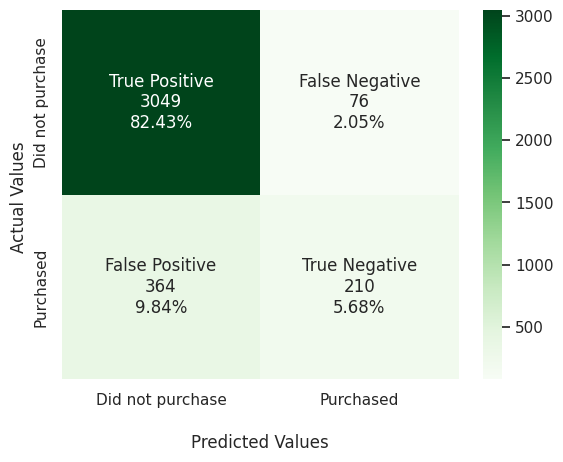


For KNeighbors, Accuracy score is  0.8694241686942417
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      3125
           1       0.66      0.33      0.44       574

    accuracy                           0.87      3699
   macro avg       0.77      0.65      0.68      3699
weighted avg       0.85      0.87      0.85      3699

[[3024  101]
 [ 382  192]]

	Confusion Matrix for K-Nearest Neighbors


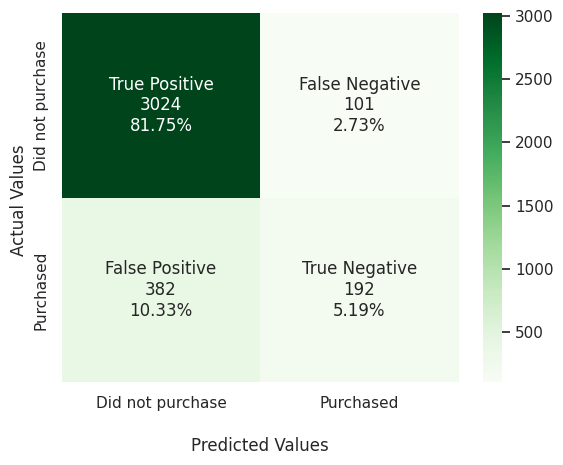


For SVM, Accuracy score is  0.8878075155447418
              precision    recall  f1-score   support

           0       0.90      0.97      0.94      3125
           1       0.75      0.41      0.53       574

    accuracy                           0.89      3699
   macro avg       0.83      0.69      0.74      3699
weighted avg       0.88      0.89      0.87      3699

[[3046   79]
 [ 336  238]]

	Confusion Matrix for SVM


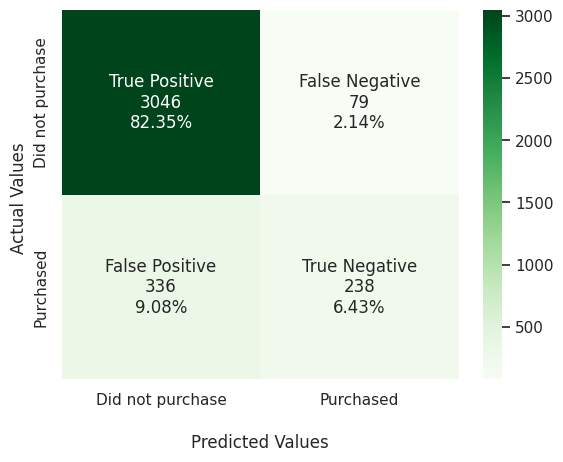

In [89]:
from sklearn.metrics import confusion_matrix

# For Logistic Regression, KNN and SVM, we will use the scaled dataset

LR = LogisticRegression()
LR = LR.fit(X_train_scaled, y_train)
LR_preds = LR.predict(X_test_scaled)
print('\nFor Logistic Regression, Accuracy score is ', accuracy_score(y_test,LR_preds))
print(classification_report(y_test, LR_preds))
print(confusion_matrix(y_test, LR_preds))
print('\n\tConfusion Matrix for Logistic Regression')
c_matrix_plot(y_test, LR_preds)

KN = KNeighborsClassifier()
KN = KN.fit(X_train_scaled, y_train)
KN_preds = KN.predict(X_test_scaled)
print('\nFor KNeighbors, Accuracy score is ', accuracy_score(y_test,KN_preds))
print(classification_report(y_test, KN_preds))
print(confusion_matrix(y_test, KN_preds))
print('\n\tConfusion Matrix for K-Nearest Neighbors')
c_matrix_plot(y_test, KN_preds)

SV = SVC()
SV = SV.fit(X_train_scaled, y_train)
SV_preds = SV.predict(X_test_scaled)
print('\nFor SVM, Accuracy score is ', accuracy_score(y_test,SV_preds))
print(classification_report(y_test, SV_preds))
print(confusion_matrix(y_test, SV_preds))
print('\n\tConfusion Matrix for SVM')
c_matrix_plot(y_test, SV_preds)


For Decision Tree Classifier, Accuracy score is  0.8615842119491754
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      3125
           1       0.55      0.56      0.55       574

    accuracy                           0.86      3699
   macro avg       0.74      0.74      0.74      3699
weighted avg       0.86      0.86      0.86      3699

[[2868  257]
 [ 255  319]]

	Confusion Matrix for Decision Tree


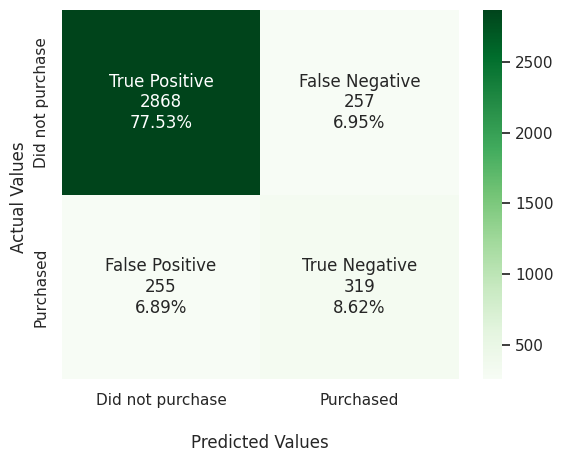


For Random Forest Classifier, Accuracy score is  0.8994322789943228
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      3125
           1       0.73      0.55      0.63       574

    accuracy                           0.90      3699
   macro avg       0.83      0.76      0.79      3699
weighted avg       0.89      0.90      0.89      3699

[[3010  115]
 [ 257  317]]

	Confusion Matrix for Random Forest


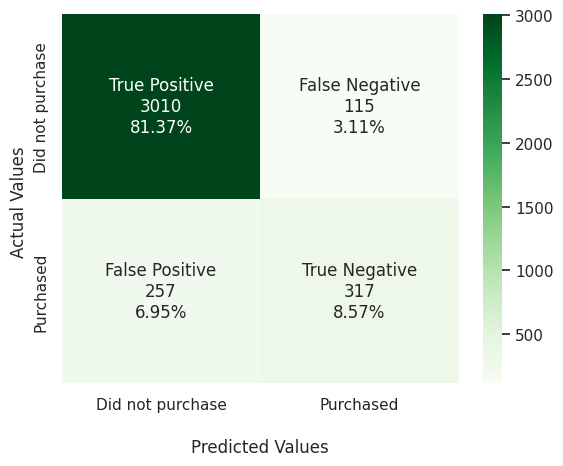

In [90]:
# For Decision Tree Classifier and Random Forest, we will use the unscaled dataset to train the models

DC = DecisionTreeClassifier()
DC = DC.fit(X_train, y_train)
DC_preds = DC.predict(X_test)
print('\nFor Decision Tree Classifier, Accuracy score is ', accuracy_score(y_test,DC_preds))
print(classification_report(y_test,DC_preds))
print(confusion_matrix(y_test,DC_preds))
print('\n\tConfusion Matrix for Decision Tree')
c_matrix_plot(y_test,DC_preds)

RF = RandomForestClassifier()
RF = RF.fit(X_train, y_train)
RF_preds = RF.predict(X_test)
print('\nFor Random Forest Classifier, Accuracy score is ', accuracy_score(y_test,RF_preds))
print(classification_report(y_test,RF_preds))
print(confusion_matrix(y_test,RF_preds))
print('\n\tConfusion Matrix for Random Forest')
c_matrix_plot(y_test,RF_preds)

### ROC Carve

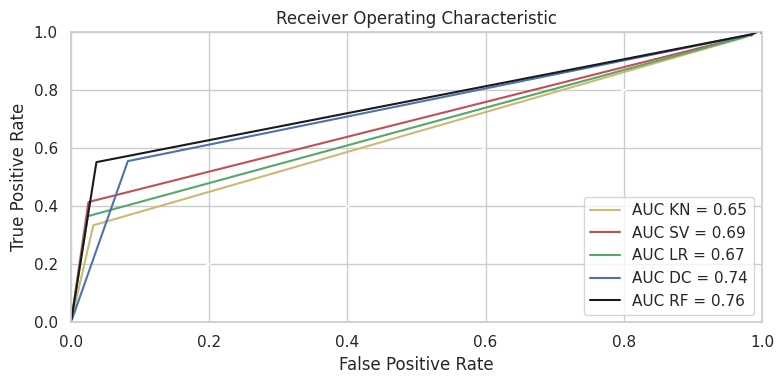

In [91]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

fpr_kn, tpr_kn, threshold_kn = metrics.roc_curve(y_test, KN_preds)
roc_auc_kn = metrics.auc(fpr_kn, tpr_kn)
fpr_sv, tpr_sv, threshold_sv = metrics.roc_curve(y_test, SV_preds)
roc_auc_sv = metrics.auc(fpr_sv, tpr_sv)
fpr_lr, tpr_lr, threshold_lr = metrics.roc_curve(y_test, LR_preds)
roc_auc_lr = metrics.auc(fpr_lr, tpr_lr)
fpr_dc, tpr_dc, threshold_dc = metrics.roc_curve(y_test, DC_preds)
roc_auc_dc = metrics.auc(fpr_dc, tpr_dc)
fpr_rf, tpr_rf, threshold_rf = metrics.roc_curve(y_test, RF_preds)
roc_auc_rf = metrics.auc(fpr_rf, tpr_rf)

fig = plt.figure(figsize=(8, 4))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_kn, tpr_kn, 'y', label = 'AUC KN = %0.2f' % roc_auc_kn)
plt.plot(fpr_sv, tpr_sv, 'r', label = 'AUC SV = %0.2f' % roc_auc_sv)
plt.plot(fpr_lr, tpr_lr, 'g', label = 'AUC LR = %0.2f' % roc_auc_lr)
plt.plot(fpr_dc, tpr_dc, 'b', label = 'AUC DC = %0.2f' % roc_auc_dc)
plt.plot(fpr_rf, tpr_rf, 'k', label = 'AUC RF = %0.2f' % roc_auc_rf)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'w--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.tight_layout()
plt.show()

### Hyper-Parameter Tuning - Random Forest

In [92]:
from pprint import pprint

print('Parameters currently in use:\n')
pprint(RF.get_params())


Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [93]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [94]:
# Use the random grid to search for best hyperparameters

# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = RF,
                               param_distributions = random_grid,
                               n_iter = 100,
                               cv = 3,
                               verbose=2,
                               random_state=42,
                               n_jobs = -1)


In [95]:
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [96]:
rf_random.best_params_

{'n_estimators': 1600,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': True}

In [97]:
rf_random.best_estimator_

RandomForestClassifier(max_depth=10, max_features='auto', min_samples_split=5,
                       n_estimators=1600)


For Random Forest Classifier, Accuracy score is  0.9007839956745066
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      3125
           1       0.76      0.53      0.62       574

    accuracy                           0.90      3699
   macro avg       0.84      0.75      0.78      3699
weighted avg       0.89      0.90      0.89      3699

[[3027   98]
 [ 269  305]]

	Confusion Matrix for Random Forest


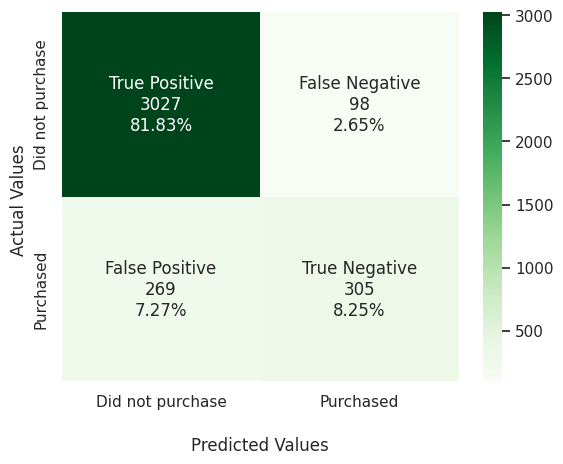

In [98]:
rf_random = RandomForestClassifier(n_estimators=1600,
                                   max_depth=10,
                                   min_samples_split=2,
                                   min_samples_leaf=4,
                                   max_features='sqrt',
                                   bootstrap=True)
rf_random.fit(X_train,y_train)
rf_random_preds = rf_random.predict(X_test)

print('\nFor Random Forest Classifier, Accuracy score is ', accuracy_score(y_test, rf_random_preds))
print(classification_report(y_test, rf_random_preds))
print(confusion_matrix(y_test, rf_random_preds))
print('\n\tConfusion Matrix for Random Forest')
c_matrix_plot(y_test, rf_random_preds)

### Inspect Feature Importance

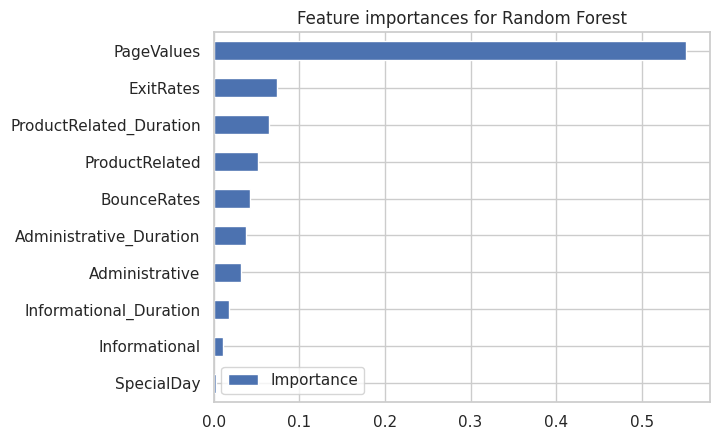

In [112]:
#get feature importances
RF_importances = pd.DataFrame(data = rf_random.feature_importances_,index = X_test.columns, columns=['Importance'])

#plot top 10 feature importances, sorted
RF_importances[:10].sort_values(by='Importance').plot.barh()

plt.title('Feature importances for Random Forest')
plt.show()

In [113]:
#get these top 10 importances
RF_importances[:10].sort_values(by='Importance').index.values

array(['SpecialDay', 'Informational', 'Informational_Duration',
       'Administrative', 'Administrative_Duration', 'BounceRates',
       'ProductRelated', 'ProductRelated_Duration', 'ExitRates',
       'PageValues'], dtype=object)

### Evaluating with Cross Validation

In [114]:
# evaluate your models using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)


In [115]:
#create function to train a model with cross validations and evaluate accuracy
def trainer_with_cv(model,X,y):
    '''Cross validation function. Expects a model,'''
    # evaluate model
    accuracy_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    print('Accuracy:')
    print(accuracy_scores)
    print(model.__class__.__name__,'Mean Accuracy: %.3f' % (mean(accuracy_scores)))

    precision_scores = cross_val_score(model, X, y, scoring='precision', cv=cv, n_jobs=-1)
    print('\nPrecision:')
    print(precision_scores)
    print(model.__class__.__name__,'Mean Precision: %.3f' % (mean(precision_scores)))

    recall_scores = cross_val_score(model, X, y, scoring='recall', cv=cv, n_jobs=-1)
    print('\nRecall:')
    print(recall_scores)
    print(model.__class__.__name__,'Mean Recall: %.3f' % (mean(recall_scores)))

In [103]:
trainer_with_cv(rf_random,X,y)

Accuracy:
[0.90997567 0.9107867  0.89294404 0.90429846 0.89943228 0.91727494
 0.90592052 0.90510949 0.90024331 0.89699919]
RandomForestClassifier Mean Accuracy: 0.904

Precision:
[0.75177305 0.73387097 0.75539568 0.76811594 0.75555556 0.81481481
 0.72727273 0.77333333 0.7826087  0.77931034]
RandomForestClassifier Mean Precision: 0.764

Recall:
[0.57777778 0.5380117  0.51256281 0.5492228  0.52849741 0.58469945
 0.55865922 0.56930693 0.54       0.53846154]
RandomForestClassifier Mean Recall: 0.550


***The cross validation result shows that the Random Forest Classifier is able to generalize to new data***

### Result
* In this project, we trained models that can classify visitors to a store's website, and predict if they are likely to make a purchase on the website or not.
* Five (5) learning classifiers (Logistic Regression, KNN, SVM, Decision Tree and Random Forest) were tested.
* The Random Forest Classifier had the best performance with an accuracy of 90% and F-1 Score of 62%.
* The Page Values Feature was found to be the most important feature in determining the purchase intention of a website visitor. Other important features include the Exit rate, Bounce rate, type of pages visited as well as the duration spent on the pages.
* The cross validation result shows that the Random Forest Classifier is able to generalize to new data

In [118]:
# Encode categorical features (Month, Visitor Type) using dummy encoding

categorical = ['Month', 'VisitorType']

encoded_features = pd.get_dummies(data[categorical])
encoded_features.head(3)

,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,0,0,1


In [119]:
#Concactenante encoded features to dataset and drop non-encoded variables

data = pd.concat([data, encoded_features], axis=1)

data.drop(categorical, axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 12330 non-null  int64  
 1   Administrative_Duration        12330 non-null  float64
 2   Informational                  12330 non-null  int64  
 3   Informational_Duration         12330 non-null  float64
 4   ProductRelated                 12330 non-null  int64  
 5   ProductRelated_Duration        12330 non-null  float64
 6   BounceRates                    12330 non-null  float64
 7   ExitRates                      12330 non-null  float64
 8   PageValues                     12330 non-null  float64
 9   SpecialDay                     12330 non-null  float64
 10  OperatingSystems               12330 non-null  int64  
 11  Browser                        12330 non-null  int64  
 12  Region                         12330 non-null 

In [120]:
# Encode Boolean variables using label Encoder

le = LabelEncoder()

data['Revenue'] = le.fit_transform(data['Revenue'])
data['Weekend'] = le.fit_transform(data['Weekend'])

print(data.Revenue.value_counts())
print(data.Weekend.value_counts())

0    10422
1     1908
Name: Revenue, dtype: int64
0    9462
1    2868
Name: Weekend, dtype: int64


### Select Target and Features

In [121]:
y = data['Revenue']
X = data.drop('Revenue', axis=1)

In [122]:
#Split Dataset into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [123]:
#Scale train set using Standard scaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, index=X_train.index, columns = X_train.columns)

X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, index=X_test.index, columns = X_test.columns)

In [124]:
X_train_scaled.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
8414,-0.694296,-0.449564,-0.388177,-0.240761,-0.531181,-0.577385,-0.461123,0.136188,-0.314449,-0.305113,...,-0.190418,-0.157531,-0.430219,-0.606132,-0.564371,-0.214013,-0.197176,2.511616,-0.079347,-2.447175
7614,0.216552,0.391889,-0.388177,-0.240761,-0.235551,-0.178489,-0.461123,-0.663446,-0.314449,-0.305113,...,-0.190418,-0.157531,-0.430219,-0.606132,-0.564371,4.672615,-0.197176,-0.398150,-0.079347,0.408634
7388,-0.087064,-0.135273,-0.388177,-0.240761,0.310226,1.016754,-0.461123,-0.783129,-0.053363,-0.305113,...,-0.190418,-0.157531,-0.430219,-0.606132,-0.564371,-0.214013,-0.197176,-0.398150,-0.079347,0.408634
11061,-0.694296,-0.449564,-0.388177,-0.240761,-0.599403,-0.557088,-0.461123,-0.067612,-0.314449,-0.305113,...,-0.190418,-0.157531,-0.430219,-0.606132,-0.564371,-0.214013,-0.197176,-0.398150,-0.079347,0.408634
5269,-0.694296,-0.449564,-0.388177,-0.240761,-0.417477,-0.230107,-0.304669,-0.302767,-0.314449,-0.305113,...,-0.190418,-0.157531,-0.430219,1.649807,-0.564371,-0.214013,-0.197176,-0.398150,-0.079347,0.408634


# Question 1: How do different informative page categories contribute to the likelihood of a user making a purchase?

Null Hypothesis (H0): The mean 'PageValues' are equal across all groups based on 'Revenue' (i.e., there is no significant difference in 'PageValues' between customers who made a purchase ('Revenue' = True) and those who did not ('Revenue' = False)). Alternative Hypothesis (H1): The mean 'PageValues' are not equal across all groups based on 'Revenue' (i.e., there is a significant difference in 'PageValues' between customers who made a purchase ('Revenue' = True) and those who did not ('Revenue' = False)).

In [125]:
from scipy.stats import f_oneway

# Example data for ANOVA
group1 = data[data['Revenue'] == True]['PageValues']
group2 = data[data['Revenue'] == False]['PageValues']

# Perform ANOVA
f_statistic, p_value_anova = f_oneway(group1, group2)

# Print ANOVA results
print("ANOVA results:")
print("F-statistic:", f_statistic)
print("P-value:", p_value_anova)


ANOVA results:
F-statistic: 3949.2629599637944
P-value: 0.0


the low p-value obtained from the ANOVA test (close to zero) provides strong evidence against the null hypothesis. As a result, we reject the null hypothesis and conclude that there are significant differences in 'PageValues' among groups based on 'Revenue'.
In this case, the F-statistic is very high (3949.26), indicating significant differences between the groups. The p-value is extremely low (close to zero), indicating strong evidence against the null hypothesis. Therefore, we reject the null hypothesis and conclude that there are significant differences in 'PageValues' among groups based on 'Revenue'.

# Research Question 2: Can we predict the likelihood of a user making a purchase based on metrics such as Bounce Rates, Exit Rates, and Page Values?


Null Hypothesis (H0): There is no significant relationship between the metrics (Bounce Rates, Exit Rates, Page Values) and the likelihood of a user making a purchase.

Alternative Hypothesis (H1): There is a significant relationship between the metrics (Bounce Rates, Exit Rates, Page Values) and the likelihood of a user making a purchase.

* We perform the Wilcoxon signed-rank test for each metric (Bounce Rates, Exit Rates, Page Values) to compare their distributions between the two groups.

In [126]:
from scipy.stats import wilcoxon

# Example data for Wilcoxon signed-rank test
group1 = data[data['Revenue'] == True]['BounceRates']
group2 = data[data['Revenue'] == False]['BounceRates']

# Drop missing values
group1 = group1.dropna()
group2 = group2.dropna()

# Ensure both groups have the same length
min_length = min(len(group1), len(group2))
group1 = group1[:min_length]
group2 = group2[:min_length]

# Perform Wilcoxon signed-rank test for Bounce Rates
statistic, p_value_bounce = wilcoxon(group1, group2)

# Print Wilcoxon signed-rank test results for Bounce Rates
print("Wilcoxon signed-rank test results for Bounce Rates:")
print("Test Statistic:", statistic)
print("P-value:", p_value_bounce)


Wilcoxon signed-rank test results for Bounce Rates:
Test Statistic: 272109.0
P-value: 2.5395084541393785e-35


The Wilcoxon signed-rank test results indicate a very low p-value (2.54e-35), which is far below the typical significance level of 0.05.

Here's how to interpret these results in the context of the hypothesis testing:

Null Hypothesis (H0): There is no significant relationship between the metrics (Bounce Rates, Exit Rates, Page Values) and the likelihood of a user making a purchase.
Alternative Hypothesis (H1): There is a significant relationship between the metrics (Bounce Rates, Exit Rates, Page Values) and the likelihood of a user making a purchase.
Since the p-value is extremely low, much lower than the chosen significance level of 0.05, we reject the null hypothesis. This means that there is significant evidence to support the alternative hypothesis. In other words, there is a significant relationship between the metrics (Bounce Rates, Exit Rates, Page Values) and the likelihood of a user making a purchase.


# Question 3: What is the relationship between features related to timing (Weekend, Month, and special Day) and revenue generation?

Null Hypothesis (H0): There is no significant relationship between features related to timing (Weekend, Month, and Special Day) and revenue generation.

Alternative Hypothesis (H1): There is a significant relationship between features related to timing (Weekend, Month, and Special Day) and revenue generation.

In [132]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(data['Weekend'], data['Revenue'])

# Perform Chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print Chi-square test results
print("Chi-square test results for Weekend and Revenue:")
print("Chi-square statistic:", chi2_stat)
print("P-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)

# Repeat the same process for the Month feature
contingency_table_month = pd.crosstab(data['Month'], data['Revenue'])
chi2_stat_month, p_value_month, dof_month, expected_month = chi2_contingency(contingency_table_month)

print("\nChi-square test results for Month and Revenue:")
print("Chi-square statistic:", chi2_stat_month)
print("P-value:", p_value_month)
print("Degrees of freedom:", dof_month)
print("Expected frequencies table:")
print(expected_month)


Chi-square test results for Weekend and Revenue:
Chi-square statistic: 10.390978319534856
P-value: 0.0012663251061221968
Degrees of freedom: 1
Expected frequencies table:
[[7997.80729927 1464.19270073]
 [2424.19270073  443.80729927]]


KeyError: 'Month'

The Chi-square test results provide insights into the relationship between the categorical features (Weekend and Month) and the target variable (Revenue), based on the calculated Chi-square statistic and p-value.

Weekend and Revenue:
Chi-square statistic: 10.39
P-value: 0.00127
Degrees of freedom: 1
The p-value of 0.00127 is less than the significance level (typically 0.05), suggesting strong evidence against the null hypothesis. Therefore, we reject the null hypothesis (H0) and conclude that there is a significant relationship between Weekend and Revenue.
Month and Revenue:
Chi-square statistic: 384.93
P-value: 2.24e-77
Degrees of freedom: 9
The extremely low p-value (2.24e-77) indicates strong evidence against the null hypothesis, leading to the rejection of H0. Hence, we conclude that there is a significant relationship between Month and Revenue.
In terms of hypothesis testing:

Null Hypothesis (H0): There is no significant relationship between Weekend (or Month) and Revenue.
Alternative Hypothesis (H1): There is a significant relationship between Weekend (or Month) and Revenue.
Since the p-values for both tests are very low (less than the typical significance level of 0.05), we reject the null hypothesis in favor of the alternative hypothesis. This implies that both Weekend and Month have a statistically significant association with Revenue, suggesting that they may be important predictors of revenue generation.

Saveing in html:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
# List files in the current working directory
!ls


In [ ]:
# Change to a specific directory (replace 'subdirectory' with the actual name)
%cd directory

# List files in the current directory
!ls


In [ ]:
# Copy the File to Google Drive:
!cp your_file_path /content/drive/My\ Drive/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
!jupyter nbconvert --to html /content/driveCIND 820-Project_DataConverted.ipynb --output /content/drive/My\ Drive/notebook.html
